# Logistic Regression

### Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

### 1. Load Data

In [2]:
data = np.loadtxt('ex2data1.txt',delimiter = ',')

### 2. Extract X and y

In [3]:
x1 = data[:,0]
x2 = data[:,1]
X = np.array([x1,x2]).T

y = data[:,2]

### 3. Shape Checking 

In [4]:
# check number of samples
m = X.shape[0]
print("Number of samples: ", m)
# check number of features
n = X.shape[1]
print("Number of classes: ", n)

# check number of y
assert m == y.shape[0]

Number of samples:  100
Number of classes:  2


### 4. Cleaning Data

##### 4.1 Checking for missing data

In [5]:
#Pandas 
#Convert to DataFrame to check for missing data
df = pd.DataFrame(X)
print('Missing values for train data:\n------------------------\n', df.isnull().sum())

Missing values for train data:
------------------------
 0    0
1    0
dtype: int64


##### 4.x Convert back to numpy

In [6]:
X = df.values
# print(X)

### 5. Normalization/ Standardization

In [7]:
mean = np.mean(X, axis = 0)
std = np.std(X, axis = 0)
print(mean)
print(std)
X = (X-np.mean(X, axis = 0))/np.std(X, axis = 0)
print(X.std(axis = 0))
print(X.mean(axis = 0))
# print(y)
print(X)

[65.64427406 66.22199809]
[19.36068671 18.48963567]
[1. 1.]
[-7.66053887e-17  1.11022302e-15]
[[-1.60224763  0.63834112]
 [-1.82625564 -1.2075414 ]
 [-1.53903969  0.3612943 ]
 [-0.28210129  1.0863683 ]
 [ 0.69152826  0.49337794]
 [-1.06199728 -0.5357394 ]
 [-0.23437234  1.63818413]
 [ 0.4845113  -1.06373024]
 [ 0.53998666  1.14651105]
 [ 0.97044832 -1.22709853]
 [ 1.56075461 -1.51418452]
 [ 0.48393864 -1.92641626]
 [ 0.86065022  0.55490359]
 [ 0.1921582   1.70347834]
 [-1.34839922  0.53082781]
 [-0.60293429  1.24314792]
 [ 0.17694982 -0.72913975]
 [ 0.11893077 -1.05699346]
 [ 0.25914553  1.44433023]
 [ 0.58543944 -1.00845873]
 [ 0.0892403  -1.26468472]
 [ 1.2413042  -0.02285779]
 [-0.78042096 -0.93923898]
 [-1.62350714 -1.19053019]
 [ 0.63426559  0.14875155]
 [-0.17423248  0.20186768]
 [ 0.75131151 -1.15742514]
 [ 1.41886056 -1.4830648 ]
 [-0.19700066 -0.86350486]
 [-1.38726847 -0.06632457]
 [-0.22029098  0.35619356]
 [ 1.02063763 -0.49595429]
 [-0.69916396 -0.16735724]
 [-0.70239602  

### 6. Plot Data

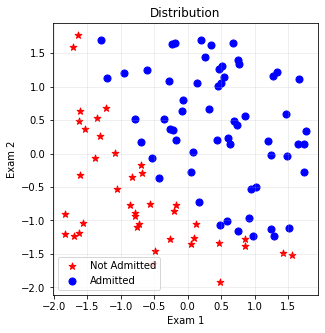

In [8]:
fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
# plot by colors
# TRY ADD DICTIONARY
# plt.scatter(X[:,0],X[:,1], alpha = 0.5, c = y, cmap='viridis')

ax.scatter(X[y==0,0], X[y==0,1], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[y==1,0], X[y==1,1], s=50, c='b', marker='o', label='Admitted')
plt.legend(loc = 'best')
plt.show()

### 6. Spliting train and test

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3)

# double check the shapes
assert X_train.shape[0] == y_train.shape[0]
# assert len(X_train)  == len(y_train)
assert X_test.shape[0] == y_test.shape[0]
# assert len(X_test) == len(y_test)

print('shapes of X_train, y_train')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train
(70, 2) (70,)
shapes of X_test, y_test
(30, 2) (30,)


### Data Preparation

##### Add Dummy

In [10]:
intercept = np.ones((X_train.shape[0], 1))
X_train = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test = np.concatenate((intercept, X_test), axis=1)  #add intercept

print('shapes of X_train, y_train with DUMMY added')
print(X_train.shape,y_train.shape)
print('shapes of X_test, y_test with DUMMY added')
print(X_test.shape,y_test.shape)

shapes of X_train, y_train with DUMMY added
(70, 3) (70,)
shapes of X_test, y_test with DUMMY added
(30, 3) (30,)


#### Batch

In [28]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def get_yhat(X, theta):
    return sigmoid(X @ theta)

#loss = cost
def get_loss(X,y,theta):
    yhat = get_yhat(X,theta)
    loss_new = -(np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))) / y.shape[0]
#     print(loss_new.shape)
    return loss_new

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

# for theta updating
# error = h_theta(X,theta) - y
def gradient(X,y,theta):
    grad = X.T @ (get_yhat(X,theta)-y)#/y.shape[0] 
    return grad

def gradient_descent(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
    theta = theta_initial
    tol = 0.001    
    loss_history_train = []
    loss_history_test = []
    loss_old_train = np.inf
    iter_stop = 0  
    for i in range(max_iter):
        # calculate costs
        loss_new_train = get_loss(X_train,y_train,theta)
        loss_test = get_loss(X_test,y_test,theta)        
#         print(loss_new)
        
        # early stopping?
        if delta_loss(loss_new_train, loss_old_train,tol):
            diff = np.abs(loss_new_train - loss_old_train)
#             print(diff)
            iter_stop = i
            break
        loss_old_train = loss_new_train
#         print(loss_old.shape)
        
#         if i%100 == 0:
        print("cost iter",i,':',loss_old_train)
        loss_history_train.append(loss_old_train)
        loss_history_test.append(loss_test)
        
        
        # cal grad to update theta
        grad = gradient(X_train,y_train,theta)
#         print(grad)
        
        # update theta
        theta = theta - alpha* grad
#         print('theta',theta)
        
    return loss_history_train,loss_history_test, theta, iter_stop,diff

#### Stochastic

In [12]:
# def sigmoid(z):   
#     return 1 / (1 + np.exp(-z))

# def get_yhat(X, theta):
#     return sigmoid(X @ theta)

# #loss = cost
# def get_loss(X,y,theta):
#     yhat = get_yhat(X,theta)
#     loss_new = -(np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))) / y.shape[0]
#     return loss_new

# def get_loss_single(X,y,theta):
#     yhat = get_yhat(X,theta)
#     loss_new = -(np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat)))
#     return loss_new


# #for early stopping
# def delta_loss(loss_new, loss_old, tol):
#     return np.abs(loss_new - loss_old) < tol

# def gradient(X,y,theta):
#     grad = X.T.dot(get_yhat(X,theta)-y)
#     return grad

# def gradient_descent_stochastic(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
#     theta = theta_initial
#     tol = 0.001    
#     loss_history_train = []
#     loss_history_test = []
#     loss_old_train = np.inf
#     iter_stop = 0  
#     for i in range(max_iter):
#         #random number
#         idx = np.random.randint(X_train.shape[0])
#         idx_test = np.random.randint(X_test.shape[0])
#         X_idx = X_train[idx,:].reshape(1,-1)
#         X_test_idx = X_test[idx_test,:].reshape(1,-1)
# #         print(y_train.shape,idx)
#         y_idx = y_train[idx] #sometimes iloc
#         y_test_idx = y_test[idx_test]
        
#         # calculate costs
#         loss_new_train = get_loss_single(X_idx,y_idx,theta)
#         loss_test = get_loss_single(X_test_idx,y_test_idx,theta)
        
#         # early stopping?
#         if delta_loss(loss_new_train, loss_old_train,tol):
#             diff = np.abs(loss_new_train - loss_old_train)
# #             print(diff)
#             iter_stop = i
#             break
#         loss_old_train = loss_new_train
#         if i%100 == 0:
#             print("cost iter",i,':',loss_old_train)
# #             #append less
# #             loss_history_train.append(loss_old_train)
# #             loss_history_test.append(loss_test)
#         loss_history_train.append(loss_old_train)
#         loss_history_test.append(loss_test)
        
#         # cal grad to update theta
#         grad = gradient(X_idx,y_idx,theta)
# #         print(grad)
        
#         # update theta
#         theta = theta - alpha* grad
# #         print('theta',theta)
        
#     return loss_history_train,loss_history_test, theta, iter_stop, diff

#### Mini batch

In [13]:
# # gradient descent Stochastic
# def sigmoid(z):   
#     return 1 / (1 + np.exp(-z))

# def get_yhat(X, theta):
#     return sigmoid(X @ theta)

# #loss = cost
# def get_loss_mini(X,y,theta):
#     yhat = get_yhat(X,theta)
#     loss_new = -(np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))) / y.shape[0]
#     return loss_new

# #for early stopping
# def delta_loss(loss_new, loss_old, tol):
#     return np.abs(loss_new - loss_old) < tol

# # for theta updating
# # error = h_theta(X,theta) - y
# def gradient(X,y,theta):
#     grad = X.T.dot(get_yhat(X,theta)-y)
#     return grad

# def gradient_descent_mini(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
#     theta = theta_initial
#     tol = 0.001    
#     loss_history_train = []
#     loss_history_test = []
#     loss_old_train = np.inf
#     iter_stop = 0  
#     batch_train = int(0.1*X_train.shape[0])
#     batch_test = int(0.1*X_test.shape[0])
#     # Random index
#     idx = np.random.randint(X_train.shape[0])
#     idx_test = np.random.randint(X_test.shape[0])
#     for i in range(max_iter):
#         X_train_batch = X_train[idx:idx+batch_train]
#         y_train_batch = y_train[idx:idx+batch_train]
#         X_test_batch = X_test[idx_test:idx_test+batch_test]
#         y_test_batch = y_test[idx_test:idx_test+batch_test]  

#         loss_new_train = get_loss_mini(X_train_batch,y_train_batch,theta)
#         loss_test = get_loss_mini(X_test_batch,y_test_batch,theta)
        
#         # early stopping?
#         if delta_loss(loss_new_train, loss_old_train,tol):
#             diff = np.abs(loss_new_train - loss_old_train)
# #             print(diff)
#             iter_stop = i
#             break
#         loss_old_train = loss_new_train
#         if i%100 == 0:
#             print("cost iter",i,':',loss_old_train)
# #             #append less
# #             loss_history_train.append(loss_old_train)
# #             loss_history_test.append(loss_test)
#         loss_history_train.append(loss_old_train)
#         loss_history_test.append(loss_test)
        
#         # cal grad to update theta
#         grad = gradient(X_train_batch,y_train_batch,theta)
# #         print(grad.shape)
        
#         # update theta
#         theta = theta - alpha* grad
# #         print('theta',theta)
        
#     return loss_history_train,loss_history_test, theta, iter_stop, diff

#### Newton(mini)

In [78]:
#### CAN BE IMPLEMENTED WITH ANY TYPES OF GD!! HERE WE USE MINIBATCH!
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def get_yhat(X, theta):
    return sigmoid(X @ theta)

#loss = cost
def get_loss_mini(X,y,theta):
    yhat = get_yhat(X,theta)
    loss_new = -(np.sum(y * np.log(yhat) + (1 - y) * np.log(1 - yhat))) / y.shape[0]
    return loss_new

#for early stopping
def delta_loss(loss_new, loss_old, tol):
    return np.abs(loss_new - loss_old) < tol

# for theta updating
# error = h_theta(X,theta) - y
def gradient(X,y,theta):
    grad = X.T.dot(get_yhat(X,theta)-y)
    return grad

def get_hessian(X,y,theta):
    yhat = get_yhat(X,theta)
    return X.T @ np.diag((yhat)*(1-yhat))@X


def newton(X_train,y_train,X_test,y_test,theta_initial,alpha,max_iter):
    theta = theta_initial
    tol = 0.00001    
    loss_history_train = []
    loss_history_test = []
    loss_old_train = np.inf
    iter_stop = 0  
    batch_train = int(0.1*X_train.shape[0])
    batch_test = int(0.1*X_test.shape[0])
    # Random index
    idx = np.random.randint(X_train.shape[0])
    idx_test = np.random.randint(X_test.shape[0])
    for i in range(max_iter):
        X_train_batch = X_train[idx:idx+batch_train]
        y_train_batch = y_train[idx:idx+batch_train]
        X_test_batch = X_test[idx_test:idx_test+batch_test]
        y_test_batch = y_test[idx_test:idx_test+batch_test]  

        loss_new_train = get_loss_mini(X_train_batch,y_train_batch,theta)
        loss_test = get_loss_mini(X_test_batch,y_test_batch,theta)
        
        # early stopping?
        if delta_loss(loss_new_train, loss_old_train,tol):
            diff = np.abs(loss_new_train - loss_old_train)
#             print(diff)
            iter_stop = i
            break
        loss_old_train = loss_new_train
        if i%100 == 0:
            print("cost iter",i,':',loss_old_train)
#             #append less
#             loss_history_train.append(loss_old_train)
#             loss_history_test.append(loss_test)
        loss_history_train.append(loss_old_train)
        loss_history_test.append(loss_test)
        
        # cal grad to update theta
        grad = gradient(X_train_batch,y_train_batch,theta)
#         print(grad.shape)
        
        hessian = get_hessian(X_train,y,theta)
#         print(hessian)

        H_inverse = np.linalg.inv(hessian) #if error change to H_inverse = np.linalg.pinv(hessian)
#         print(H_inverse)
    
        # update theta
        theta = theta - alpha*H_inverse@grad #or without alpha
#         print('theta',theta)
        
    return loss_history_train,loss_history_test, theta, iter_stop, diff

### Step 2: Initializing Theta

In [65]:
theta_initial = np.zeros(X_train.shape[1])
# theta_initial = theta_initial.reshape(-1,1)
# check shape of theta
print("="*30)
print("Shape of theta: ", theta_initial.shape)

# initial theta
print("="*30)
print("Initial theta: ", theta_initial)

Shape of theta:  (3,)
Initial theta:  [0. 0. 0.]


### Step 3: Define alpha and number of iterations

In [66]:
alpha  = 0.05
max_iter = 10000

In [67]:
cost_history_train,cost_history_test,theta, iter_stop,diff = gradient_descent(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha ,max_iter = max_iter)
print(iter_stop)

cost iter 0 : 0.6931471805599454
cost iter 1 : 0.3709292543406749
cost iter 2 : 0.3189336976679154
cost iter 3 : 0.2937984256636916
cost iter 4 : 0.27844354950179334
cost iter 5 : 0.26794221606462326
cost iter 6 : 0.260258300064574
cost iter 7 : 0.2543758684527877
cost iter 8 : 0.2497239624741102
cost iter 9 : 0.2459540125026202
cost iter 10 : 0.24283979435446593
cost iter 11 : 0.240227398059475
cost iter 12 : 0.2380081103766488
cost iter 13 : 0.23610275939780334
cost iter 14 : 0.23445220425423266
cost iter 15 : 0.233011309911018
cost iter 16 : 0.2317449927872632
cost iter 17 : 0.23062554620399187
18


In [68]:
# alpha_sto  = 0.05
# max_iter_sto = 1000

In [69]:
# cost_history_train_sto,cost_history_test_sto,theta_sto, iter_stop_sto,diff_sto = gradient_descent_stochastic(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha_sto ,max_iter = max_iter_sto)
# print(iter_stop_sto)

In [70]:
# alpha_mini  = 0.001
# max_iter_mini = 1000

In [71]:
# cost_history_train_mini,cost_history_test_mini,theta_mini, iter_stop_mini,diff_mini = gradient_descent_mini(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha_mini ,max_iter = max_iter_mini)
# print(iter_stop_mini)

In [72]:
alpha_nt = 0.001
max_iter_nt = 100000
cost_history_train_nt,cost_history_test_nt,theta_nt, iter_stop_nt,diff_nt = newton(X_train,y_train,X_test,y_test,theta_initial,alpha = alpha_nt,max_iter=max_iter_nt)
print(iter_stop_nt)
print('cost history train',cost_history_train_nt)
print('cost history test',cost_history_test_nt)
print('theta',theta_nt)
print('iter stop',iter_stop_nt)
print('diff nt', diff_nt)

cost iter 0 : 0.6931471805599453
cost iter 100 : 0.6878390089256031
cost iter 200 : 0.6826015264782482
cost iter 300 : 0.6774325067970726
cost iter 400 : 0.6723298221364963
cost iter 500 : 0.667291438070064
cost iter 600 : 0.6623154084809457
cost iter 700 : 0.6573998708732124
cost iter 800 : 0.6525430419802144
cost iter 900 : 0.6477432136483727
cost iter 1000 : 0.6429987489764668
cost iter 1100 : 0.6383080786921325
cost iter 1200 : 0.633669697748756
cost iter 1300 : 0.6290821621272948
cost iter 1400 : 0.6245440858287796
cost iter 1500 : 0.6200541380443682
cost iter 1600 : 0.6156110404908419
cost iter 1700 : 0.6112135649003665
cost iter 1800 : 0.6068605306541893
cost iter 1900 : 0.6025508025507315
cost iter 2000 : 0.5982832886992349
cost iter 2100 : 0.5940569385307963
cost iter 2200 : 0.5898707409192047
cost iter 2300 : 0.5857237224045638
cost iter 2400 : 0.5816149455131814
cost iter 2500 : 0.5775435071676726
cost iter 2600 : 0.5735085371816668
cost iter 2700 : 0.5695091968338816
cost i

### Step 3: Visualize the loss (cost_history)

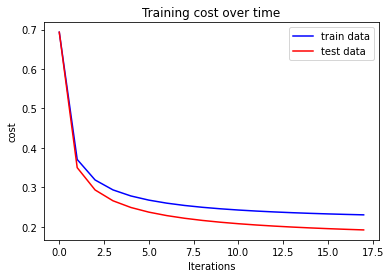

In [73]:
# Visualize the loss (cost_history)
plt.plot(cost_history_train,'b', label="train data")
plt.plot(cost_history_test,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

#### Newton

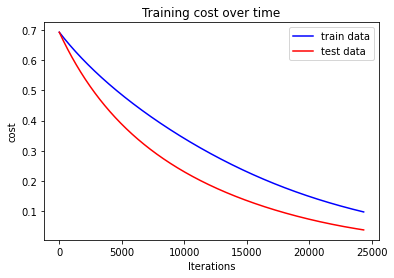

In [74]:
# Visualize the loss (cost_history)
plt.plot(cost_history_train_nt,'b', label="train data")
plt.plot(cost_history_test_nt,'r', label="test data")
plt.xlabel("Iterations")
plt.ylabel("cost")
plt.title("Training cost over time")
plt.legend()

### Answer

In [75]:
# theta, iter
print("="*30)
print("Optimal Theta: ", theta)
print("="*30)
print("Cost with optimized theta: ", cost_history_train[-1])
print("="*30)
print("Number of iterations: ", iter_stop)
print("="*30)
print("diff_loss:", diff)

Optimal Theta:  [1.05118604 2.73035629 2.48596588]
Cost with optimized theta:  0.23062554620399187
Number of iterations:  18
diff_loss: 0.000994762337405114


### Accuracy

In [76]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

y_train_pred_soft = get_yhat(X_train, theta)
y_train_pred_hard = (y_train_pred_soft > 0.5).astype(int)
y_test_pred_soft = get_yhat(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

train_rsq_soft = r_squared(y_train, y_train_pred_soft)
train_rsq_hard = r_squared(y_train, y_train_pred_hard)
train_acc = (y_train_pred_hard == y_train.astype(int)).astype(int).sum() / y_train.shape[0]
test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test.astype(int)).astype(int).sum() / y_test.shape[0]

print('Got train set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (train_rsq_soft, train_rsq_hard, train_acc))
print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got train set soft R^2 0.7040, hard R^2 0.5879, accuracy 0.90
Got test set soft R^2 0.7557, hard R^2 0.5694, accuracy 0.90


(100, 3) (3,)


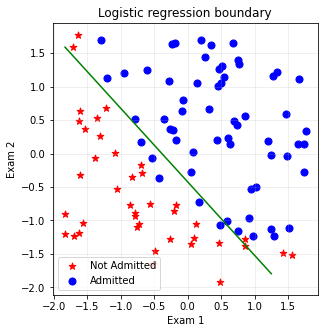

In [77]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1]],[theta[2]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[y==0,0], X[y==0,1], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[y==1,0], X[y==1,1], s=50, c='b', marker='o', label='Admitted')

intercept = np.ones((X.shape[0], 1))
X_conc = np.concatenate((intercept, X), axis=1)  #add intercept
print(X_conc.shape,theta.shape)

point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()